In [2]:
import os 
from google.colab import drive
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [3]:
system_path = '/content/drive/MyDrive/GitHub/INM363-Project'
drive.mount('/content/drive')
sys.path.append(system_path)

Mounted at /content/drive


# Dense Scenario


In [49]:

chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/ppo/dense" 
results_pth = chkpt_root + '/' + 'result.csv'
ppo_df = pd.read_csv(results_pth) 

ppo_df['eps_cumsum'] = ppo_df['episodes_this_iter'].cumsum()
ppo_df.checkpoint = ppo_df['checkpoint'].astype(int)
ppo_df.tail()

,Unnamed: 0,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
205,205,396,-0.8,2.44142,11.698,177.21,23.0,4946.0
206,206,397,-0.8,2.23088,11.698,177.35,23.0,4969.0
207,207,398,-0.8,2.17435,11.482,176.49,24.0,4993.0
208,208,399,-0.8,3.19305,11.741,159.35,34.0,5027.0
209,209,400,-0.8,3.36272,11.826,156.93,25.0,5052.0


In [52]:
chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/ppo/dense" 

#read first results file 
results_pth = chkpt_root + '/' + 'result_1.csv'
ppo_df_1 = pd.read_csv(results_pth).head(190)
#read second results file 
results_pth = chkpt_root + '/' + 'result.csv'
ppo_df_2 = pd.read_csv(results_pth) 
ppo_df_2['checkpoint'] = ppo_df_2['checkpoint'] 
#stack both dataframes 
frames = [ppo_df_1, ppo_df_2]
ppo_df = pd.concat(frames, ignore_index = True)
#cumulative sum of episodes
ppo_df['eps_cumsum'] = ppo_df['episodes_this_iter'].cumsum()
ppo_df.checkpoint = ppo_df['checkpoint'].astype(int)

ppo_df.tail()

,Unnamed: 0,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
395,205,396,-0.8,2.44142,11.698,177.21,23.0,9436.0
396,206,397,-0.8,2.23088,11.698,177.35,23.0,9459.0
397,207,398,-0.8,2.17435,11.482,176.49,24.0,9483.0
398,208,399,-0.8,3.19305,11.741,159.35,34.0,9517.0
399,209,400,-0.8,3.36272,11.826,156.93,25.0,9542.0


In [53]:
chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/icm/dense" 
results_pth = chkpt_root + '/' + 'result.csv'
icm_df = pd.read_csv(results_pth) 

icm_df['eps_cumsum'] = icm_df['episodes_this_iter'].cumsum()
icm_df.checkpoint = icm_df['checkpoint'].astype(int)
icm_df.tail()

,Unnamed: 0,Unnamed: 0.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
395,395,195,396,0.0,0.98,10.0,191.44,21.0,9214.0
396,396,196,397,0.0,0.81,10.0,192.09,20.0,9234.0
397,397,197,398,0.0,0.96,11.0,192.76,20.0,9254.0
398,398,198,399,0.0,1.09,11.0,191.72,21.0,9275.0
399,399,199,400,0.0,1.09,11.0,194.00,21.0,9296.0


In [54]:

chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/re3/dense" 
results_pth = chkpt_root + '/' + 'result.csv'
re3_df = pd.read_csv(results_pth) 

re3_df['eps_cumsum'] = re3_df['episodes_this_iter'].cumsum()
re3_df.checkpoint = re3_df['checkpoint'].astype(int)
re3_df.tail()

,Unnamed: 0,Unnamed: 0.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
395,395,195,396,0.0,12.49,18.0,58.40,59.0,18780.0
396,396,196,397,0.0,12.47,18.0,52.88,77.0,18857.0
397,397,197,398,0.0,12.96,18.0,56.38,70.0,18927.0
398,398,198,399,0.0,12.94,18.0,50.50,84.0,19011.0
399,399,199,400,0.0,12.19,17.0,52.56,71.0,19082.0


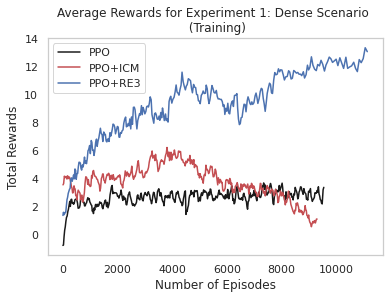

In [60]:
sns.set_style("whitegrid", {'axes.grid' : False})

plt.plot(ppo_df['eps_cumsum'], ppo_df['eps_reward_mean'], 'k-', label='PPO')

plt.plot(icm_df['eps_cumsum'], icm_df['eps_reward_mean'], 'r-', label='PPO+ICM')

plt.plot(re3_df['eps_cumsum'][:300], re3_df['eps_reward_mean'][:300], 'b-', label='PPO+RE3')


plt.legend()
plt.title("Average Rewards for Experiment 1: Dense Scenario \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Total Rewards') 
plt.show()

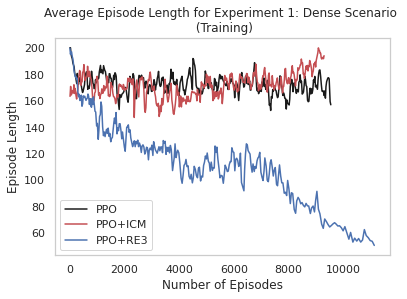

In [62]:
plt.plot(ppo_df['eps_cumsum'], ppo_df['eps_len_mean'], 'k-', label='PPO')

plt.plot(icm_df['eps_cumsum'], icm_df['eps_len_mean'], 'r-', label='PPO+ICM')

plt.plot(re3_df['eps_cumsum'][:300], re3_df['eps_len_mean'][:300], 'b-', label='PPO+RE3')

plt.legend()
plt.title("Average Episode Length for Experiment 1: Dense Scenario \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Episode Length') 
plt.show()

# Sparse Scenario

In [69]:
chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/ppo/sparse" 
results_pth = chkpt_root + '/' + 'result.csv'
ppo_df = pd.read_csv(results_pth) 

ppo_df['eps_cumsum'] = ppo_df['episodes_this_iter'].cumsum()
ppo_df.checkpoint = ppo_df['checkpoint'].astype(int)
ppo_df.tail()

,Unnamed: 0,Unnamed: 0.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
595,595,395,596,-0.8,9.88463,12.704,64.21,64.0,29872.0
596,596,396,597,-0.8,10.39622,12.708,58.79,76.0,29948.0
597,597,397,598,-0.8,10.14392,12.700,59.35,70.0,30018.0
598,598,398,599,-0.8,10.04536,12.666,61.57,65.0,30083.0
599,599,399,600,-0.8,10.52385,12.670,61.96,67.0,30150.0


In [70]:

chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/icm/sparse" 
results_pth = chkpt_root + '/' + 'result.csv'
icm_df = pd.read_csv(results_pth) 

icm_df['eps_cumsum'] = icm_df['episodes_this_iter'].cumsum()
icm_df.checkpoint = icm_df['checkpoint'].astype(int)
icm_df.head()

,Unnamed: 0,Unnamed: 0.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
0,0,0,1,0.0,2.958333,10.0,163.000000,24.0,24.0
1,1,1,2,0.0,3.387755,11.0,162.408163,25.0,49.0
2,2,2,3,0.0,3.493151,11.0,163.876712,24.0,73.0
3,3,3,4,0.0,3.540816,12.0,163.030612,25.0,98.0
4,4,4,5,0.0,3.340000,12.0,164.840000,21.0,119.0


In [71]:

chkpt_root = "/content/drive/MyDrive/GitHub/INM363-Project/model_checkpoints/re3/sparse" 
results_pth = chkpt_root + '/' + 'result.csv'
re3_df = pd.read_csv(results_pth) 

re3_df['eps_cumsum'] = re3_df['episodes_this_iter'].cumsum()
re3_df.checkpoint = re3_df['checkpoint'].astype(int)
re3_df.head()

,Unnamed: 0,Unnamed: 0.1,checkpoint,eps_reward_min,eps_reward_mean,eps_reward_max,eps_len_mean,episodes_this_iter,eps_cumsum
0,0,0,1,0.0,2.190476,10.0,174.714286,21.0,21.0
1,1,1,2,0.0,2.288889,11.0,176.133333,24.0,45.0
2,2,2,3,0.0,2.264706,11.0,175.044118,23.0,68.0
3,3,3,4,0.0,2.380435,11.0,172.913043,24.0,92.0
4,4,4,5,0.0,2.940000,11.0,165.990000,26.0,118.0


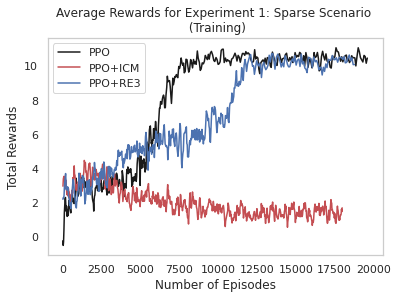

In [77]:
plt.plot(ppo_df['eps_cumsum'][:450], ppo_df['eps_reward_mean'][:450], 'k-', label='PPO')

plt.plot(icm_df['eps_cumsum'], icm_df['eps_reward_mean'], 'r-', label='PPO+ICM')

plt.plot(re3_df['eps_cumsum'], re3_df['eps_reward_mean'], 'b-', label='PPO+RE3')


plt.legend()
plt.title("Average Rewards for Experiment 1: Sparse Scenario \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Total Rewards') 
plt.show()

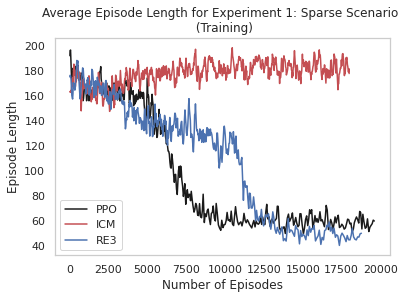

In [78]:
plt.plot(ppo_df['eps_cumsum'][:450], ppo_df['eps_len_mean'][:450], 'k-', label='PPO')

plt.plot(icm_df['eps_cumsum'], icm_df['eps_len_mean'], 'r-', label='ICM')

plt.plot(re3_df['eps_cumsum'], re3_df['eps_len_mean'], 'b-', label='RE3')

plt.legend()
plt.title("Average Episode Length for Experiment 1: Sparse Scenario \n (Training)") 
plt.xlabel('Number of Episodes') 
plt.ylabel('Episode Length') 
plt.show()
